## Forecasting Macroeconomic Indices: A Deep Learning Approach with RNNs

**<U>Potential utility of the model:</U>**

This macroeconomic forecasting model intended to be useful for audiences across the **financial** and **corporate** sectors looking to strengthen **data-driven decision making**. For example, financial institutions can leverage the projections to inform investment strategies and risk management **with greater foresight**. Similarly, corporate leaders can use the predicted economic trends to **guide business planning and operations**. A key advantage of this model is its highly customizable and adaptable to multiple forecasting contexts.

**<U>Explanation of work:</U>**

In this work, we'll explore the **model and techniques** I utilized to forecast key macroeconomic indicators, like inflation and GDP, across EU, EEA, and Switzerland countries. Data used was sourced from Eurostat, a trusted authority renowned for its high-quality and up-to-date economic statistics.

The model utilizes **Recurrent Neural Networks (RNN)**, a type of deep learning algorithm suitable for temporal data sequences. Specifically, I use time series data from 2017 to 2022 as a reference to make forecasts for 2023. While the model can generate predictions further into the future such as 2024 and 2025, we have focused the predictions on 2023; this let us to validate the model's accuracy by comparing the 2023 forecasts with actual economic data.

The decision to use the RNN model primarily stems from its ability to **process multivariate time series data**. In addition, RNNs are specifically designed to **remember past inputs in their internal state**, which makes them particularly suited for processing time series or sequential data. This inherent memory feature allows them to **capture temporal dependencies and patterns** that might be missed by other models. This is crucial for applications where the order and sequence of data points carry significant information. Considering the limited size of the available dataset, the ability of RNNs to process multivariate time series data becomes even more valuable. When working with smaller datasets, complex deep learning models are prone to overfitting, which can impair model generalization. However, by employing strategies like regularization, cross-validation, and meticulous tuning of hyperparameters, one can aim to mitigate these challenges as much as possible. Therefore, depending on the specific goals, professionals have the flexibility to explore and decide among various architectures and approaches, testing machine learning or deep learning models and refining their implementation. If larger datasets were available, or with more granular time resolutions, alternative models such as LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Units), which are advanced variants of RNNs, might be more appropriate choices.

For **hyperparameter optimization**, I used Optuna, an efficient framework for automated tuning. This methodology is designed to efficiently find optimal combinations of hyperparameters by aiming to minimize a defined objective function, such as validation loss. This allowed me to rapidly evaluate configurations of learning rate, hidden layers, dropout, and other RNN hyperparameters to derive an optimal architecture to use for forecasting.

**<U>Steps followed:</U>**
1. **Data Preprocessing**: standardize features for effective modeling
2. **Hyperparameter Tuning**: utilization of Optuna to perform automated hyperparameter optimization
3. **Model Training**: RNN model configuration and training using the hyperparameters found by Optuna
4. **Forecasting**: using the RNN trained model to predict the year 2023 based on historical time series data

**<U>Note</U>**

It is important to note that this model represents my own design development effort and it was achieved through the use of open source tools. While showcasing my personal methodology, this notebook is not intended as an authoritative guidance.

For clarity, certain sections of the code (like data extraction, analysis and preparation) have been omitted to emphasize the core aspects of this notebook. If you're not already on my GitHub profile and you're interested in seeing all parts follow the link: https://github.com/filcode/macroeconomic_analysis_machine_learning.

It is hoped toward even more sophisticated structures aimed at becoming a reference in informed decision making. I welcome collaboration across disciplines to refine techniques and increase predictive capabilities.

<!--  -->

### **<u>Before start, let's briefly clarify what Deep Learning is</u>**
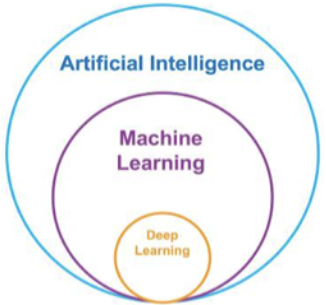


Deep learning represents an advanced subcategory of machine learning that **specializes in the use and development of Deep Neural Networks (DNNs)**. These networks are distinguished by the presence of numerous layers, also known as **"hidden layers"**, which lie between the input and output layers. Each layer is composed of neurons, computational units that process the input received by transforming it through nonlinear functions and then passing it on to the next layer. Deep learning has gained notoriety and interest in recent times due to two main factors: **the availability of large datasets** and **the increased computational capabilities of computers**. Like other machine learning models, deep learning also finds application in a variety of tasks such as classification, clustering and prediction.

Two notable variants of DNNs are **Convolutional Neural Networks (CNNs)** and **Recurrent Neural Networks (RNNs)**. Both have gained relevance in a variety of application fields. CNNs are particularly well suited for image analysis, as they employ convolutional filters organized in layers that identify and represent image details from the simplest to progressively more complex and abstract. On the other hand, **RNNs specialize in processing sequential data**, such as temporal sequences, due to their ability to "store" past states and make connections between the current and previous states.

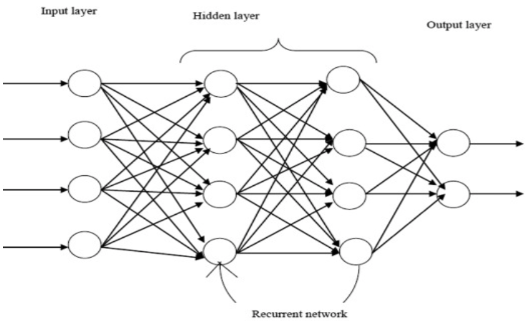

The image above captures an example of the key components and layers typically found in a neural network:
- **Input Layer**: is the entry point of the network, where data is provided to the neural network for processing. There is no computation performed in this layer; it simply serves as an interface to pass attributes to subsequent layers.
- **Hidden Layers**: are located between the input layer and the output layer. Each neuron in a hidden layer represents a combination of the neurons in the previous layer, and its "activation" is calculated by an activation function. Networks with many hidden layers are known as "deep neural networks," and this concept is the basis of deep learning.
- **Output Layer**: is the last layer of a neural network. It produces the output for the given problem. Depending on the type of problem (such as classification or regression), the activation function of this layer might vary.

Some useful insights for better domain knowledge follow:

**Activation functions**: determines whether a neuron should be activated or not. This implies that it will use some mathematical operations to determine whether the neuron's input to the network is relevant or not in the prediction process. Some common activation functions are: ReLU (Rectified Linear Unit), sigmoid, tanh and softmax.

**Weights**: represent the importance or strength of the connection between two neurons.

**Bias**: an additional parameter in each neuron that allows it to modulate its activity. This parameter plays an important role in a wide variety of situations. To try to offer a greater definition, consider that in a neural network, each neuron receives several inputs from other neurons or directly from input data. Each input is multiplied by an associated weight. The sum of these products (input multiplied by weights) represents the neuron's overall input. Before this overall input is passed through an activation function (whose definition was given above), a term called "bias" is added. This bias is not input-dependent, but it is value-added to modulate the activity of the neuron. For example, if a neuron's inputs are all zero, the neuron's output will also be zero (before the activation function is applied). This could lead to "inactive" neurons that do not contribute to the overall ability of the network to make predictions. Bias prevents this inactivity.

**Backpropagation**: the mechanism by which a neural network "learns" from its errors and adjusts its weights and biases accordingly. To better describe this step, it consists of an iterative dynamic that begins with a direct propagation phase, also called feedforward in which inputs are passed through the neural network to produce an output. The output produced is compared with the desired output, and the difference (error) also called the cost or loss function is calculated. This error represents how much the network's current output deviates from what it should be. Beginning with this last output layer arrived, the error is "back-propagated" through the network, layer by layer, in the opposite direction (output to input).  Back-propagation uses the error produced by the network to determine how each weight contributes to that error. By calculating the gradient, you have a "compass" that indicates in which direction to update the weights to reduce the error. This gradient indicates the direction and amount in which the error would increase if one were to change the weights slightly. Therefore, to reduce the error one will have to move in the direction opposite to the gradient.

**Optimizers**: algorithms that update the weights and biases of the network based on the errors calculated during back-propagation.

While this covers the core components, neural networks can contain additional layers or custom architectures depending on the intended purpose.

<!--  -->

### <u>About Data</u>

**<u>Time Span:</u>**

2017 to 2022
   
**<u>Geographical Coverage:</u>**

EU (European Union), EEA (European Economic Area) and Switzerland

**<u>Key indicators used for model forecasting</u>** ***(name assigned, Eurostat code and description)***:

***1. Demographic***

- **PopDens** (TPS00003): Population Density (persons per square kilometre)

***2. Macroeconomic***

- **RealGDPGRChg(%)** (TEC00115): Yearly Change in Real GDP Growth Rate - (p)
- **GrDebtToGDP(%)** (SDG_17_40): Gross Debt as Percentage of GDP - (p)
- **GovExpToGDP(%)** (TEC00023): Government Expenditure as Percentage of GDP - (p)
- **IntTdGoods** (TET00002): Net Trade of Goods (excluding EFTA countries)

***3. Population & Labor***

- **EmpDomCon** (TEC00112): Number of People Employed in the Country
- **DepOnWorkP(%)** (DEMO_PJANIND__custom_6776614): Dependency on Working Population - (p)
- **EduLev3(5-8)(%)** (EDAT_LFSE_03__custom_6767752): Percentage of Population with Tertiary Education (levels 5-8) - (p)
- **InduCostChg(%)** (LC_LCI_R2_A__custom_6999771): Yearly Change in Labor Industry Cost - (p)
- **HICPChg(%)** (PRC_HICP_AIND__custom_7000055): Harmonized Index of Consumer Prices (Please verify the selected basket of goods) - (p)

(*p: denotes variables that were forecasted by the model and will be displayed.)

<!--  -->

<!--  -->

### a. Preliminary setting activities

### <u>Set Up environment</u>

In [2]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

from scipy import stats
from scipy import optimize
import statsmodels.api as sm
import statsmodels.formula.api as smf

from tensorflow.keras import datasets, layers, models
from tensorflow import keras

from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [2]:
# Visualize just subset: remove ',None'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### <u>Converting numerical data to categorical</u>

In [5]:
columns_to_convert = ['geo', 'country', 'year']

for col in columns_to_convert:
    if col in df_all_replaced.columns:
        df_all_replaced[col] = df_all_replaced[col].astype('category')
        
data = df_all_replaced.copy()

In [6]:
# rename dataset
df_macro = df_all_replaced.copy()

### <u>Overview of the dataset structure and sample data</u>

In [15]:
df_macro.head(10)

,country,year,PopDens,RealGDPGRChg(%),GrDebtToGDP(%),GovExpToGDP(%),IntTdGoods,EmpDomCon,DepOnWorkP(%),EduLev3(5-8)(%),InduCostChg(%),HICPChg(%)
0,Austria,2013,102.9,0.0,81.3,51.6,-6115.3,4219.77,48.1,22.2,2.9,3.4
1,Austria,2014,103.7,0.7,84.0,52.4,-2828.7,4259.90,48.4,20.3,2.9,1.8
2,Austria,2015,104.9,1.0,84.9,51.1,-2942.4,4285.54,48.7,19.6,2.9,0.8
3,Austria,2016,106.0,2.0,82.8,50.1,-5102.1,4341.33,48.8,19.6,0.9,0.7
4,Austria,2017,106.8,2.3,78.5,49.3,-6819.9,4412.56,49.1,19.3,3.4,2.3
5,Austria,2018,107.1,2.4,74.1,48.8,-7578.8,4487.09,49.5,18.9,3.6,1.5
6,Austria,2019,107.6,1.5,70.6,48.7,-5419.8,4535.09,49.9,18.7,1.9,1.1
7,Austria,2020,107.6,-6.5,82.9,56.8,-2646.7,4460.93,50.2,18.7,6.5,2.3
8,Austria,2021,108.1,4.6,82.3,56.1,-14191.0,4551.00,50.6,18.5,0.3,0.7
9,Austria,2022,108.5,4.9,78.4,52.7,-20593.4,4669.26,51.1,18.6,5.7,10.7


### <u> UDF (User-Defined Function) following will be used to plot results obtained</u>

**Loss history**

In [19]:
def plot_training_history(history):
    
    # Extract training history data.
    train_loss = history.history['loss']
    val_loss = history.history.get('val_loss', None)  # there may be no validation loss
    epochs_range = range(1, len(train_loss) + 1)  # epochs start from 1
    
    plt.figure(figsize=(12, 6))
    
    # Training Loss Chart
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Loss')
    
    # Graph of Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    
    if val_loss is not None:
        plt.plot(epochs_range, val_loss, label='Validation Loss')
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    
    plt.tight_layout()
    plt.show()

**Error**

In [20]:
def evaluate_model(model, history, X_valid, y_valid, scaler):
    # Valutation loss
    print('Valutation loss')
    test_loss = model.evaluate(X_valid, y_valid)
    print(f'Test Loss: {test_loss}')

    # Use history to get the final training and validation loss
    print(f"Final training loss: {history.history['loss'][-1]}")
    print(f"Final validation loss: {history.history['val_loss'][-1]}")

    print('\nError')
    # Predictions on the validation set
    predictions = model.predict(X_valid)

    # Invert the scaling for predictions
    inv_predictions = scaler.inverse_transform(predictions)

    # Invert the scaling for actual values
    inv_y_valid = scaler.inverse_transform(y_valid)

    # Calculate metrics
    mse = mean_squared_error(inv_y_valid, inv_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(inv_y_valid, inv_predictions)

    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')

    return mse, rmse, mae, inv_predictions, inv_y_valid

<!--  -->

### b. Forecasting EU, EEA and Switzerland macroeconomic indices

### <u>1. Data Preprocessing: standardize features for effective modeling</u>

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardization
df_sorted = df_macro.sort_values(by=['year', 'country'])
df_values = df_sorted.drop(columns=['geo', 'country', 'year', 'ToTPop.'])

data_matrix = df_values.values.reshape(len(df_all_replaced['year'].unique()), -1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_matrix)

### Train-Validation Split

In [12]:
train = scaled_data[:]
valid = scaled_data[4:]
X_train, y_train = prepare_data(train, 5)
X_valid, y_valid = prepare_data(valid, 5)

In [13]:
X_train.shape

(5, 5, 300)

In [14]:
y_train.shape

(5, 300)

### <u>2. Hyperparameter Tuning: utilization of Optuna to perform automated hyperparameter optimization</u>

In [15]:
import optuna
import random
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, BatchNormalization, GRU, SimpleRNN
from tensorflow.keras.initializers import GlorotNormal, HeNormal, GlorotUniform
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

In [1187]:
tf.keras.backend.clear_session() # resets the internal state of backend and preventing interference between consecutive models

def objective(trial, X_train, y_train, X_valid, y_valid, n_steps=None, 
                                  n_input_units=None, epochs=None, weight_initializer=None): # seed=None
    
    # Hyperparameter optimization
    n_layers = trial.suggest_int('n_layers', 1, 3)
    n_units = trial.suggest_int('n_units', 50, 200)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32])
    activation_function = trial.suggest_categorical('activation_function', ['tanh', 'LeakyReLU', 'PReLU', 'softplus', 'elu'])
    # batch_size = trial.suggest_int('batch_size', 16, 128, log=True) # log scale to explore bigger range values
    
    if weight_initializer == 'GlorotNormal':
        initializer = GlorotNormal(seed=trial.number)
    elif weight_initializer == 'HeNormal':
        initializer = HeNormal(seed=trial.number)
    else:
        initializer = GlorotUniform(seed=trial.number) # default initializer

    model = Sequential()

    # Input Layer
    model.add(RNN(n_units, activation=activation_function, return_sequences=True, input_shape=(n_steps, n_input_units), kernel_initializer=initializer))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())

    # Hidden Layers
    for _ in range(n_layers - 1):  # Added n_layers - 1 additional RNN layers
        model.add(RNN(n_units, activation=activation_function, return_sequences=True, kernel_initializer=initializer))
        model.add(Dropout(dropout_rate))
        model.add(BatchNormalization())

    # Last RNN layer (before Dense layer) with return_sequences set to False
    model.add(RNN(n_units, activation=activation_function, kernel_initializer=initializer))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(n_input_units))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

    # Fit the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_valid, y_valid), callbacks=[early_stop, reduce_lr])

    # Get the minimum validation loss
    val_loss = min(history.history['val_loss'])

    return val_loss

In [16]:
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, X_train, y_train, X_valid, y_valid, 5,
                                       X_train.shape[2], 150, weight_initializer=None), n_trials=150) # seed=trial.number

In [512]:
def print_study_results(studies):
    """
    This feature accepts a list of Optuna studies and prints the results of the best trial for each of them.
    """
    for idx, study in enumerate(studies, 1):
        print(f"--- Study {idx} ---")
        print('Number of finished trials: ', len(study.trials), '(it is also seed number)')
        print('Best trial:')
        trial = study.best_trial
        print('Value: ', trial.value)
        print('Params: ', trial.params)
        print('Seed: ', trial.number)
        print('---' * 10)  # to separate studies with lines

In [513]:
# Using the previous function:
studies = [study]
print_study_results(studies)

--- Study 1 ---
Number of finished trials:  150 (it is also seed number)
Best trial:
Value:  0.03339410945773125
Params:  {'n_layers': 1, 'n_units': 62, 'dropout_rate': 0.27767537586361435, 'learning_rate': 0.0022584377651873972, 'batch_size': 32, 'activation_function': 'elu'}
Seed:  21
------------------------------


In [380]:
# Best params found by Optuna
best_params_whole = study.best_params

### <u>3. Model Training: RNN model configuration and training using the hyperparameters found by Optuna</u>

In [17]:
def create_and_train_model_manual(algo=None, X_train=None, y_train=None, X_valid=None, y_valid=None, 
                                  n_steps=None, n_layers=None, n_units_2=None,
                                  n_units=None, dropout_rate=None, 
                                  learning_rate=None, batch_size=None, n_input_units=None, 
                                  epochs=None, activation_function=None,
                                  weight_initializer='GlorotUniform', seed=None):
    
    print('Model used', algo)
    
    if weight_initializer == 'GlorotNormal':
        initializer = GlorotNormal()
    elif weight_initializer == 'HeNormal':
        initializer = HeNormal()
    else:
        initializer = GlorotUniform()

    model = Sequential()

    # Input Layer
    model.add(algo(n_units_2, return_sequences=True, activation=activation_function, input_shape=(n_steps, n_input_units), kernel_initializer=initializer))
    model.add(Dropout(dropout_rate))
    # model.add(BatchNormalization())

    # Hidden Layers
    # for _ in range(n_layers - 1):
    # model.add(algo(n_units, activation=activation_function, return_sequences=True, kernel_initializer=initializer))
    # model.add(Dropout(dropout_rate))
    # model.add(BatchNormalization())

    # Second layer
    model.add(algo(n_units, activation=activation_function, kernel_initializer=initializer))
    model.add(Dropout(dropout_rate))
    # model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(n_input_units))

    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_valid, y_valid), callbacks=[early_stop, reduce_lr], verbose=1)
    
    plot_training_history(history)
    
    return model, history

Model used <class 'keras.src.layers.rnn.simple_rnn.SimpleRNN'>
Epoch 1/200


C:\Users\utente\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


1/1 [==============================] - 3s 3s/step - loss: 1.6779 - val_loss: 2.1425 - lr: 0.0023
Epoch 2/200
1/1 [==============================] - 0s 77ms/step - loss: 1.4414 - val_loss: 1.8372 - lr: 0.0023
Epoch 3/200
1/1 [==============================] - 0s 79ms/step - loss: 1.2084 - val_loss: 1.5252 - lr: 0.0023
Epoch 4/200
1/1 [==============================] - 0s 78ms/step - loss: 1.0630 - val_loss: 1.1988 - lr: 0.0023
Epoch 5/200
1/1 [==============================] - 0s 77ms/step - loss: 1.0449 - val_loss: 0.9283 - lr: 0.0023
Epoch 6/200
1/1 [==============================] - 0s 73ms/step - loss: 0.8638 - val_loss: 0.6931 - lr: 0.0023
Epoch 7/200
1/1 [==============================] - 0s 76ms/step - loss: 0.7482 - val_loss: 0.5069 - lr: 0.0023
Epoch 8/200
1/1 [==============================] - 0s 70ms/step - loss: 0.6115 - val_loss: 0.3664 - lr: 0.0023
Epoch 9/200
1/1 [==============================] - 0s 66ms/step - loss: 0.6136 - val_loss: 0.2689 - lr: 0.0023
Epoch 10/200
1/

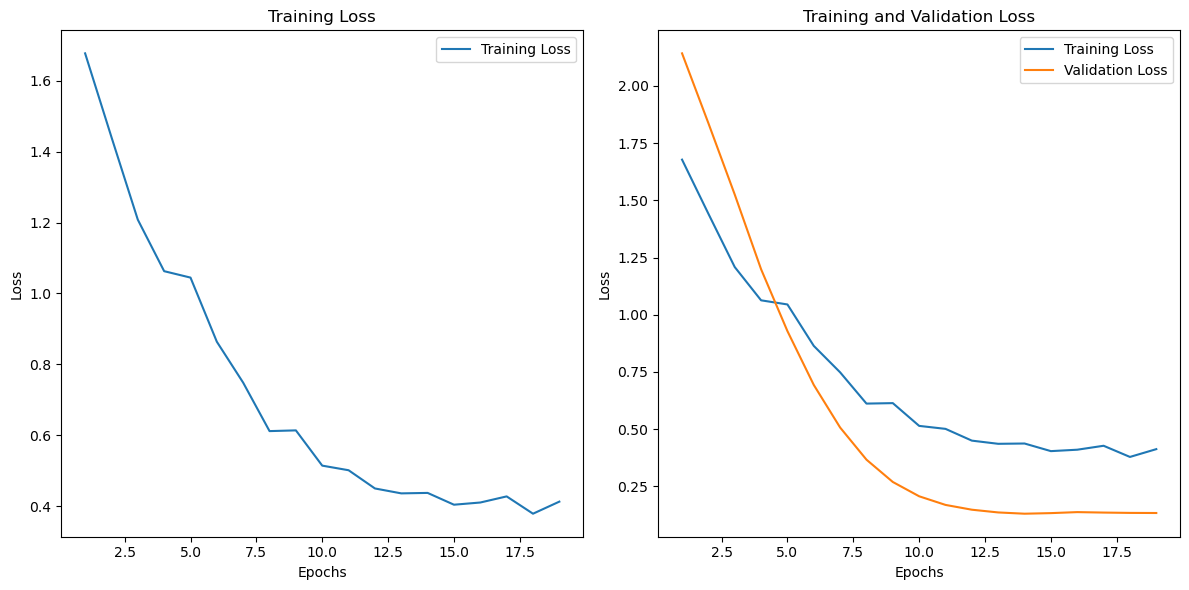

In [111]:
tf.keras.backend.clear_session() 

# Best params found by Optuna
best_params = {'n_layers': 1, 'n_units': 62, 'dropout_rate': 0.27767537586361435, 'learning_rate': 0.0022584377651873972, 'batch_size': 32, 'activation_function': 'elu'}

# Setting params using previous udf
model, history = create_and_train_model_manual(algo=SimpleRNN,
                                                X_train=X_train, 
                                                y_train=y_train, 
                                                X_valid=X_valid, 
                                                y_valid=y_valid,
                                                n_steps=5,
                                                n_layers=best_params['n_layers'],
                                                n_units_2= 300, # None,
                                                n_units=240, # best_params['n_units'], # adjusted according to tests
                                                dropout_rate=best_params['dropout_rate'], 
                                                learning_rate=best_params['learning_rate'],
                                                batch_size= best_params['batch_size'],
                                                n_input_units=X_train.shape[2],
                                                epochs=200,
                                                activation_function= 'tanh'
                                                weight_initializer='GlorotUniform'
                                                seed=np.random
                                            )

In [99]:
model

### Validation
Please focus on the loss rather than the error. Although the values have been standardized, they still have inherently different magnitudes because of their original natures (percent vs. whole number), making error a potentially anomalous indicator.

In [112]:
# Valutation loss
print('Valutation loss')
test_loss = model.evaluate(X_valid, y_valid)
print(f'Test Loss: {test_loss}')

# Use history to get the final training and validation loss
print(f"Final training loss: {history.history['loss'][-1]}")
print(f"Final validation loss: {history.history['val_loss'][-1]}")

print('\nError')
# Invert the scaling for predictions
predictions = model.predict(X_valid)
inv_predictions = scaler.inverse_transform(predictions)

# Invert the scaling for actual values
inv_y_valid = scaler.inverse_transform(y_valid)

# Calculate metrics
mse = mean_squared_error(inv_y_valid, inv_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(inv_y_valid, inv_predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Valutation loss
1/1 [==============================] - 0s 29ms/step - loss: 0.1302
Test Loss: 0.13021479547023773
Final training loss: 0.4124375283718109
Final validation loss: 0.13326722383499146

Error
1/1 [==============================] - 0s 332ms/step
Mean Squared Error (MSE): 3165099.368082107
Root Mean Squared Error (RMSE): 1779.0726146175448
Mean Absolute Error (MAE): 272.38355183951063


### Columns considered to predictions

In [113]:
cols = ['PopDens', 'RealGDPGRChg(%)', 'GrDebtToGDP(%)',
       'GovExpToGDP(%)', 'IntTdGoods', 'EmpDomCon', 'DepOnWorkP(%)',
       'EduLev3(5-8)(%)', 'InduCostChg(%)', 'HICPChg(%)']

### Modelling

In [114]:
countries = sorted(df_all_replaced['country'].unique())
variables = cols  # these are the economic variables

# Reshaping the data
reshaped_actual = inv_y_valid.reshape(len(countries), len(variables))
reshaped_predictions = inv_predictions.reshape(len(countries), len(variables))

# Convert to DataFrame
actual_df = pd.DataFrame(reshaped_actual, columns=variables, index=countries)
predicted_df = pd.DataFrame(reshaped_predictions, columns=variables, index=countries)

comparison_df = pd.concat([actual_df, predicted_df], axis=1, keys=['Actual', 'Predicted'])

In [115]:
# If're interested in seeing difference between actual and predicted values
# difference_df = actual_df - predicted_df
# difference_df

### <u>4. Forecasting: using the RNN trained model to predict the year 2023 based on historical time series data</u>

In [116]:
def predict_future(model, last_data, n_steps, n_future, n_output_units=None):
    future_preds = []
    input_data = last_data[-n_steps:].tolist()
    for _ in range(n_future):
        # Reshape and predict
        input_array = np.array(input_data[-n_steps:])
        pred = model.predict(input_array.reshape(1, n_steps, n_output_units))
        
        # Append the prediction to future_preds and input_data
        future_preds.append(pred)
        input_data.append(pred[0])
        
    return np.array(future_preds)

### Set the number of past years to be considered and future years to predict

In [117]:
n_steps = 5 # past periods considered
n_future = 3 # number years to predict (2023, 2024 and 2025)
future_predictions = predict_future(model, scaled_data, n_steps, n_future, n_output_units=X_train.shape[2])

1/1 [==============================] - 0s 29ms/step


In [118]:
len(future_predictions)

3

### Reshape and unscale

In [119]:
reshaped_predictions = future_predictions.reshape(future_predictions.shape[0], -1)
# Invert scaling
unscaled_predictions = scaler.inverse_transform(reshaped_predictions)

In [120]:
unscaled_predictions.shape

(3, 300)

In [121]:
def create_prediction_dataframe(future_predictions, countries, predictors):
    
    data_list = []
      
    # Create an empty dataframe with the specified columns
    columns = ['country', 'year'] + predictors
    df = pd.DataFrame(columns=columns)
    
    # Years for which predictions are available
    years = [2023, 2024, 2025]

    # Populate the dataframe
    for country_index, country in enumerate(countries):
        for year_index, year in enumerate(years):
            # Extract the prediction for that year for the specific country
            start_idx = country_index * len(predictors)
            end_idx = start_idx + len(predictors)
            country_predictions = future_predictions[year_index, start_idx:end_idx]
            
            # Create a new row for the dataframe
            data = {'country': country,
                    'year': year}
            
            # Add economic predictor values
            for j, predictor in enumerate(predictors):
                data[predictor] = country_predictions[j]

            # Append the data to the dataframe
            data_list.append(data)

    
    df = pd.DataFrame(data_list)
    
    return df

In [122]:
countries = df_all_replaced['country'].unique()  # add all countries
predictors= cols
pred_df = create_prediction_dataframe(unscaled_predictions, countries, predictors)

### Predictions of macroeconomic indices reported below

In [128]:
pred_df[['country', 'year', 'RealGDPGRChg(%)', 'GrDebtToGDP(%)', 'GovExpToGDP(%)', 'DepOnWorkP(%)',
         'EduLev3(5-8)(%)', 'InduCostChg(%)', 'HICPChg(%)']][::3]

,country,year,RealGDPGRChg(%),GrDebtToGDP(%),GovExpToGDP(%),DepOnWorkP(%),EduLev3(5-8)(%),InduCostChg(%),HICPChg(%)
0,Austria,2023,-0.764172,79.895218,52.829174,50.985382,19.274612,4.793575,7.585292
3,Belgium,2023,0.228506,108.660278,55.725830,56.456665,23.744654,1.876399,5.912247
6,Bulgaria,2023,3.090296,18.731880,41.637939,55.583626,20.640200,8.758749,13.137529
9,Croatia,2023,3.426502,77.666428,46.675835,53.851177,18.618786,6.784200,5.240807
12,Cyprus,2023,3.210842,92.728439,38.858131,45.867622,19.795208,4.381270,2.439365
15,Czechia,2023,1.869134,35.678391,45.210918,52.457497,12.329314,4.940374,11.455482
18,Denmark,2023,1.241852,32.787891,50.388672,57.046162,24.921438,1.978882,3.914456
21,Estonia,2023,2.546486,18.605547,38.582191,55.521267,16.647821,7.999469,9.401677
24,Finland,2023,-0.121912,69.895210,53.562504,61.461720,18.585989,1.538211,3.010310
27,France,2023,0.655108,103.532967,56.384991,61.338940,22.581020,1.310273,2.984105


### <u> Model validation by testing with some external resources:</u>

**HICP(%)**
- [Eurostat - Italy](https://economy-finance.ec.europa.eu/economic-surveillance-eu-economies/italy/economic-forecast-italy_en#:~:text=HICP%20inflation%20is%20projected%20to,2023%20and%202.9%25%20in%202024.)
- [Eurostat - France](https://economy-finance.ec.europa.eu/economic-surveillance-eu-economies/france/economic-forecast-france_en#:~:text=Thus%2C%20headline%20inflation%20is%20expected,and%202.5%25%20in%202024)
- [Eurostat - Czechia](https://economy-finance.ec.europa.eu/economic-surveillance-eu-economies/czechia/economic-forecast-czechia_en#:~:text=The%20annual%20average%20inflation%20rate,and%20related%20spill%2Dover%20effects.)
- [Portuguese Public Finance Council - Portugal](https://www.cfp.pt/en/publications/economic-and-fiscal-outlook/economic-and-fiscal-outlook-2023-2027)

**GrDebtToGDP(%)**
- [FitchRatings - Italy](https://www.fitchratings.com/research/sovereigns/italy-significantly-loosens-its-fiscal-plans-11-10-2023)
- [European Commision - Denmark](https://economy-finance.ec.europa.eu/system/files/2023-06/ip228_en.pdf)
- [FitchRatings - Spain](https://www.fitchratings.com/research/sovereigns/fitch-affirms-spain-at-a-outlook-stable-26-05-2023)

**GovExpToGDP(%)**
- [Statista - Germany](https://fr.statista.com/outlook/co/macroeconomic-indicators/public-finance/germany#:~:text=The%20general%20government%20expenditure%20in,%E2%82%AC2.05tn%20by%202023.)
- [Portuguese Public Finance Council - Portugal](https://www.cfp.pt/en/publications/economic-and-fiscal-outlook/economic-and-fiscal-outlook-2023-2027)
- [Caixa Bank Research - Spain](https://www.caixabankresearch.com/en/economics-markets/public-sector/2023-2026-stability-programme-reduction-spains-budget-deficit)

-------------

***Thank you, Filippo Maria Mariani***